In [2]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd
import scipy as sc

The SIR model is defined by the following set of coupled ordinary differential equations

\begin{align}
    \frac{dS}{dt}&=\Lambda-\mu S-\beta \frac{IS}{N}\\
    \frac{dI}{dt}&=\beta \frac{IS}{N}-(\gamma+\mu)I\\
    \frac{dR}{dt}&=\gamma I-\mu R
\end{align}

Where $S:Susceptibles$, $I:Infected$ y $R:Recovered$, $\Lambda^{-1}=\mu^{-1}:Period\;of\;birth\;and\;death$, $\beta^{-1}:Time\;between\;infections$ and $\gamma:typical\;time\;of\;recovered$.

In [3]:
"""Methods for SIR model computational solution"""

def susceptible(Lambda,Mu,Beta,Gamma,s,i,t):
    """
    Differential equation of Susceptible.
    """
    return Lambda-Mu*s-Beta*s*i

def infected(Lambda,Mu,Beta,Gamma,s,i,t):
    """
    Differential equation of Infected.
    """
    return Beta*s*i-(Mu+Gamma)*i

def RungeKutta4(susceptible,infected,t0,s_0,i_0,tF,Lambda,Mu,Beta,Gamma,dt):
    """
    RungeKutta method is used to solve the coupled equations of the SIR model.
    """
    n=int((tF-t0)/dt)+1 #h=(tf-t0)/(n-1)
    t=np.linspace(t0,tF,n)
    s=np.zeros([n])
    i=np.zeros([n])
    r=np.zeros([n])

    s[0]=s_0
    i[0]=i_0
    r[0]=1-(s_0+i_0)

    for j in range(1,n,1):
        ds_1 = dt*susceptible(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1],
            i[j-1],
            t[j-1],
        )
        di_1 = dt*infected(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1],
            i[j-1],
            t[j-1],
        )

        ds_2 = dt*susceptible(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1]+ds_1/2.0,
            i[j-1]+di_1/2.0,
            t[j-1]+dt/2.0,
        )
        di_2 = dt*infected(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1]+ds_1/2.0,
            i[j-1]+di_1/2.0,
            t[j-1]+dt/2.0,
        )

        ds_3 = dt*susceptible(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1]+ds_2/2.0,
            i[j-1]+di_2/2.0,
            t[j-1]+dt/2.0,
        )
        di_3 = dt*infected(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1]+ds_2/2.0,
            i[j-1]+di_2/2.0,
            t[j-1]+dt/2.0,
        )

        ds_4 = dt*susceptible(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1]+ds_3,
            i[j-1]+di_3,
            t[j-1]+dt,
        )
        di_4 = dt*infected(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1]+ds_3,
            i[j-1]+di_3,
            t[j-1]+dt,
        )

        s[j]=s[j-1]+(ds_1+2.0*ds_2+2.0*ds_3+ds_4)/6.0
        i[j]=i[j-1]+(di_1+2.0*di_2+2.0*di_3+di_4)/6.0
        r[j]=1-(s[j]+i[j])

    return t,s,i,r

### Varying beta with gamma and period of births and deaths constants

147081285.32570118


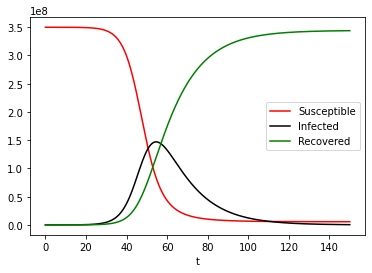

In [22]:
"""Model parameters beta=0.3, Mu=0, Gamma^-1=14"""

Lambda = 0
Mu=0
Beta=0.3
Gamma=1/14

#Initial conditions.
Frac=0.05
N=7*10**9*Frac
s_0=6999999900/N*Frac
i_0=100000/N*Frac
dt=0.1*Frac

#Days
t_0=0
t_F=150


T=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[0]
S=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[1]*N
I=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[2]*N
R=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[3]*N

print(max(I))
plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,I,label="Infected",color="black")
plt.plot(T,R,label="Recovered",color="green")
plt.legend()
plt.xlabel("t")
plt.show()

202709482.78780264


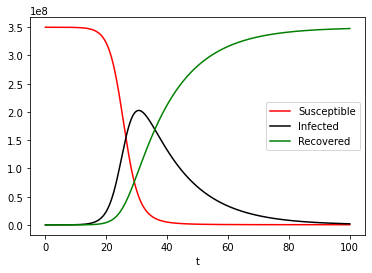

In [23]:
"""Model parameters beta=0.5, Mu=0, Gamma^-1=14"""

Lambda = 0
Mu=0
Beta=0.5
Gamma=1/14

#Initial conditions.
Frac=0.05
N=7*10**9*Frac
s_0=6999999900/N*Frac
i_0=100000/N*Frac
dt=0.1*Frac

#Days
t_0=0
t_F=100


T=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[0]
S=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[1]*N
I=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[2]*N
R=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[3]*N

print(max(I))
plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,I,label="Infected",color="black")
plt.plot(T,R,label="Recovered",color="green")
plt.legend()
plt.xlabel("t")
plt.show()

259028553.46092737


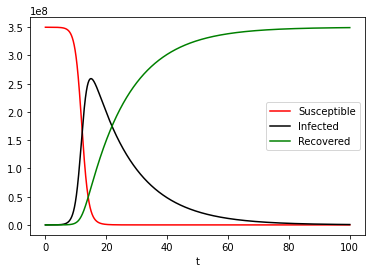

In [24]:
"""Model parameters beta=1, Mu=0, Gamma^-1=14"""

Lambda = 0
Mu=0
Beta=1
Gamma=1/14

#Initial conditions.
Frac=0.05
N=7*10**9*Frac
s_0=6999999900/N*Frac
i_0=100000/N*Frac
dt=0.1*Frac

#Days
t_0=0
t_F=100


T=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[0]
S=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[1]*N
I=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[2]*N
R=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[3]*N

print(max(I))
plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,I,label="Infected",color="black")
plt.plot(T,R,label="Recovered",color="green")
plt.legend()
plt.xlabel("t")
plt.show()

### Varying period of births and deaths with gamma and beta constants

146971865.07025552


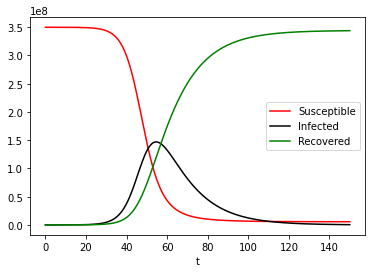

In [26]:
"""Model parameters beta=0.3, Mu=0.000008, Gamma^-1=14"""

Lambda = 0
Mu=0.000008
Beta=0.3
Gamma=1/14

#Initial conditions.
Frac=0.05
N=7*10**9*Frac
s_0=6999999900/N*Frac
i_0=100000/N*Frac
dt=0.1*Frac

#Days
t_0=0
t_F=150


T=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[0]
S=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[1]*N
I=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[2]*N
R=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[3]*N

print(max(I))
plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,I,label="Infected",color="black")
plt.plot(T,R,label="Recovered",color="green")
plt.legend()
plt.xlabel("t")
plt.show()

145987756.93502152


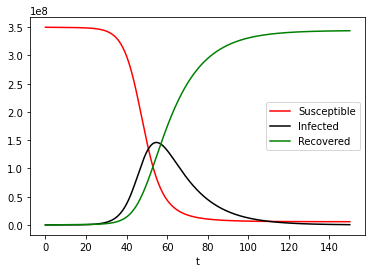

In [27]:
"""Model parameters beta=0.3, Mu=0.00008, Gamma^-1=14"""

Lambda = 0
Mu=0.00008
Beta=0.3
Gamma=1/14

#Initial conditions.
Frac=0.05
N=7*10**9*Frac
s_0=6999999900/N*Frac
i_0=100000/N*Frac
dt=0.1*Frac

#Days
t_0=0
t_F=150


T=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[0]
S=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[1]*N
I=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[2]*N
R=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[3]*N

print(max(I))
plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,I,label="Infected",color="black")
plt.plot(T,R,label="Recovered",color="green")
plt.legend()
plt.xlabel("t")
plt.show()

136215360.35315573


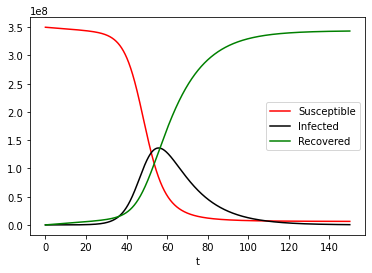

In [41]:
"""Model parameters beta=0.3, Mu=0.0008, Gamma^-1=14"""

Lambda = 0
Mu=0.0008
Beta=0.3
Gamma=1/14

#Initial conditions.
Frac=0.05
N=7*10**9*Frac
s_0=6999999900/N*Frac
i_0=100000/N*Frac
dt=0.1*Frac

#Days
t_0=0
t_F=150


T=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[0]
S=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[1]*N
I=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[2]*N
R=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[3]*N

print(max(I))
plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,I,label="Infected",color="black")
plt.plot(T,R,label="Recovered",color="green")
plt.legend()
plt.xlabel("t")
plt.show()